## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  44.426189   315.708592  0.966828   5.625892  1.360143
1  51.585500   605.601279  0.572237   1.183097  1.677762
2  75.388010  1009.202948  0.026412   3.026582  0.466810
3  36.569456  1542.743546  0.089424  10.049560  1.267610
4  30.180668   836.724251  0.150894   3.927787  1.308219


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.47717 | train_mse: 5.71997 | train_mae: 1.76692 |  0:00:00s
epoch 1  | loss: 1.21348 | train_mse: 4.25928 | train_mae: 1.51803 |  0:00:00s
epoch 2  | loss: 0.99378 | train_mse: 3.53879 | train_mae: 1.38585 |  0:00:00s


epoch 3  | loss: 0.90871 | train_mse: 3.02852 | train_mae: 1.30137 |  0:00:00s
epoch 4  | loss: 0.98888 | train_mse: 2.82699 | train_mae: 1.26636 |  0:00:00s
epoch 5  | loss: 0.95647 | train_mse: 2.4222  | train_mae: 1.16528 |  0:00:00s


epoch 6  | loss: 0.73094 | train_mse: 2.15931 | train_mae: 1.10121 |  0:00:00s
epoch 7  | loss: 0.74841 | train_mse: 1.9299  | train_mae: 1.03995 |  0:00:00s


epoch 8  | loss: 0.76787 | train_mse: 1.78849 | train_mae: 1.00623 |  0:00:01s
epoch 9  | loss: 0.70708 | train_mse: 1.64834 | train_mae: 0.97889 |  0:00:01s
epoch 10 | loss: 0.71239 | train_mse: 1.47049 | train_mae: 0.92546 |  0:00:01s


epoch 11 | loss: 0.68051 | train_mse: 1.33409 | train_mae: 0.88046 |  0:00:01s
epoch 12 | loss: 0.56245 | train_mse: 1.22302 | train_mae: 0.84193 |  0:00:01s


epoch 13 | loss: 0.73157 | train_mse: 1.13951 | train_mae: 0.81578 |  0:00:01s


epoch 14 | loss: 0.59385 | train_mse: 1.05947 | train_mae: 0.78303 |  0:00:01s
epoch 15 | loss: 0.71241 | train_mse: 0.9778  | train_mae: 0.74415 |  0:00:02s
epoch 16 | loss: 0.52648 | train_mse: 0.89777 | train_mae: 0.71113 |  0:00:02s


epoch 17 | loss: 0.58179 | train_mse: 0.84389 | train_mae: 0.68506 |  0:00:02s
epoch 18 | loss: 0.4835  | train_mse: 0.77437 | train_mae: 0.65501 |  0:00:02s
epoch 19 | loss: 0.66518 | train_mse: 0.716   | train_mae: 0.62846 |  0:00:02s


epoch 20 | loss: 0.52564 | train_mse: 0.66444 | train_mae: 0.60506 |  0:00:02s
epoch 21 | loss: 0.64807 | train_mse: 0.65192 | train_mae: 0.59801 |  0:00:02s
epoch 22 | loss: 0.6628  | train_mse: 0.63913 | train_mae: 0.59624 |  0:00:02s


epoch 23 | loss: 0.48051 | train_mse: 0.61448 | train_mae: 0.58482 |  0:00:02s
epoch 24 | loss: 0.5094  | train_mse: 0.59912 | train_mae: 0.57774 |  0:00:02s


epoch 25 | loss: 0.47479 | train_mse: 0.57861 | train_mae: 0.57037 |  0:00:03s
epoch 26 | loss: 0.43869 | train_mse: 0.55671 | train_mae: 0.55958 |  0:00:03s
epoch 27 | loss: 0.53652 | train_mse: 0.54034 | train_mae: 0.54844 |  0:00:03s


epoch 28 | loss: 0.58869 | train_mse: 0.52173 | train_mae: 0.53707 |  0:00:03s
epoch 29 | loss: 0.40679 | train_mse: 0.50462 | train_mae: 0.52897 |  0:00:03s
epoch 30 | loss: 0.56143 | train_mse: 0.49438 | train_mae: 0.52375 |  0:00:03s


epoch 31 | loss: 0.42095 | train_mse: 0.4739  | train_mae: 0.508   |  0:00:03s
epoch 32 | loss: 0.48175 | train_mse: 0.45968 | train_mae: 0.4991  |  0:00:03s


epoch 33 | loss: 0.46543 | train_mse: 0.4427  | train_mae: 0.48672 |  0:00:03s
epoch 34 | loss: 0.48229 | train_mse: 0.43004 | train_mae: 0.47734 |  0:00:03s


epoch 35 | loss: 0.38098 | train_mse: 0.40217 | train_mae: 0.45389 |  0:00:04s
epoch 36 | loss: 0.50274 | train_mse: 0.38085 | train_mae: 0.43694 |  0:00:04s
epoch 37 | loss: 0.32496 | train_mse: 0.36387 | train_mae: 0.4238  |  0:00:04s


epoch 38 | loss: 0.53402 | train_mse: 0.35888 | train_mae: 0.41854 |  0:00:04s
epoch 39 | loss: 0.45171 | train_mse: 0.34776 | train_mae: 0.41032 |  0:00:04s
epoch 40 | loss: 0.38402 | train_mse: 0.34243 | train_mae: 0.40342 |  0:00:04s


epoch 41 | loss: 0.32089 | train_mse: 0.332   | train_mae: 0.39753 |  0:00:04s
epoch 42 | loss: 0.38938 | train_mse: 0.3211  | train_mae: 0.3919  |  0:00:04s


epoch 43 | loss: 0.30227 | train_mse: 0.3067  | train_mae: 0.38374 |  0:00:04s
epoch 44 | loss: 0.3054  | train_mse: 0.29832 | train_mae: 0.37722 |  0:00:04s


epoch 45 | loss: 0.43967 | train_mse: 0.287   | train_mae: 0.36631 |  0:00:05s
epoch 46 | loss: 0.3864  | train_mse: 0.27491 | train_mae: 0.36128 |  0:00:05s
epoch 47 | loss: 0.36731 | train_mse: 0.26994 | train_mae: 0.3602  |  0:00:05s


epoch 48 | loss: 0.29998 | train_mse: 0.26624 | train_mae: 0.36294 |  0:00:05s
epoch 49 | loss: 0.31578 | train_mse: 0.2618  | train_mae: 0.36304 |  0:00:05s
epoch 50 | loss: 0.38785 | train_mse: 0.2723  | train_mae: 0.37194 |  0:00:05s


epoch 51 | loss: 0.28552 | train_mse: 0.26057 | train_mae: 0.36359 |  0:00:05s
epoch 52 | loss: 0.32334 | train_mse: 0.25504 | train_mae: 0.36147 |  0:00:05s
epoch 53 | loss: 0.26794 | train_mse: 0.2502  | train_mae: 0.35615 |  0:00:05s


epoch 54 | loss: 0.4484  | train_mse: 0.25077 | train_mae: 0.35523 |  0:00:05s
epoch 55 | loss: 0.30191 | train_mse: 0.25104 | train_mae: 0.35503 |  0:00:06s
epoch 56 | loss: 0.28301 | train_mse: 0.24825 | train_mae: 0.34897 |  0:00:06s


epoch 57 | loss: 0.33635 | train_mse: 0.24454 | train_mae: 0.34557 |  0:00:06s
epoch 58 | loss: 0.25196 | train_mse: 0.24297 | train_mae: 0.3438  |  0:00:06s


epoch 59 | loss: 0.35198 | train_mse: 0.24001 | train_mae: 0.34079 |  0:00:06s
epoch 60 | loss: 0.26395 | train_mse: 0.23794 | train_mae: 0.33853 |  0:00:06s
epoch 61 | loss: 0.24748 | train_mse: 0.2375  | train_mae: 0.33916 |  0:00:06s


epoch 62 | loss: 0.45173 | train_mse: 0.2352  | train_mae: 0.33693 |  0:00:06s
epoch 63 | loss: 0.37916 | train_mse: 0.2338  | train_mae: 0.33404 |  0:00:06s


epoch 64 | loss: 0.32035 | train_mse: 0.2271  | train_mae: 0.32888 |  0:00:06s
epoch 65 | loss: 0.40765 | train_mse: 0.22493 | train_mae: 0.32675 |  0:00:07s
epoch 66 | loss: 0.40559 | train_mse: 0.22423 | train_mae: 0.32538 |  0:00:07s


epoch 67 | loss: 0.23158 | train_mse: 0.22221 | train_mae: 0.3245  |  0:00:07s
epoch 68 | loss: 0.37206 | train_mse: 0.21693 | train_mae: 0.32364 |  0:00:07s
epoch 69 | loss: 0.39643 | train_mse: 0.21484 | train_mae: 0.32656 |  0:00:07s


epoch 70 | loss: 0.20681 | train_mse: 0.20918 | train_mae: 0.32507 |  0:00:07s
epoch 71 | loss: 0.34644 | train_mse: 0.20316 | train_mae: 0.3228  |  0:00:07s
epoch 72 | loss: 0.32136 | train_mse: 0.19748 | train_mae: 0.3181  |  0:00:07s


epoch 73 | loss: 0.49358 | train_mse: 0.1923  | train_mae: 0.3123  |  0:00:07s
epoch 74 | loss: 0.27453 | train_mse: 0.18927 | train_mae: 0.31022 |  0:00:07s


epoch 75 | loss: 0.35872 | train_mse: 0.19384 | train_mae: 0.31637 |  0:00:07s
epoch 76 | loss: 0.56466 | train_mse: 0.19484 | train_mae: 0.31894 |  0:00:08s
epoch 77 | loss: 0.44476 | train_mse: 0.19384 | train_mae: 0.31885 |  0:00:08s


epoch 78 | loss: 0.38523 | train_mse: 0.19336 | train_mae: 0.31713 |  0:00:08s
epoch 79 | loss: 0.2965  | train_mse: 0.19814 | train_mae: 0.3202  |  0:00:08s
epoch 80 | loss: 0.24786 | train_mse: 0.19986 | train_mae: 0.32115 |  0:00:08s


epoch 81 | loss: 0.32796 | train_mse: 0.19344 | train_mae: 0.31773 |  0:00:08s
epoch 82 | loss: 0.25414 | train_mse: 0.18488 | train_mae: 0.30791 |  0:00:08s


epoch 83 | loss: 0.42051 | train_mse: 0.18501 | train_mae: 0.30775 |  0:00:08s
epoch 84 | loss: 0.26604 | train_mse: 0.18356 | train_mae: 0.3069  |  0:00:08s


epoch 85 | loss: 0.17416 | train_mse: 0.17929 | train_mae: 0.30191 |  0:00:08s
epoch 86 | loss: 0.23662 | train_mse: 0.17555 | train_mae: 0.29886 |  0:00:09s
epoch 87 | loss: 0.3624  | train_mse: 0.1737  | train_mae: 0.29957 |  0:00:09s


epoch 88 | loss: 0.20585 | train_mse: 0.1687  | train_mae: 0.29631 |  0:00:09s
epoch 89 | loss: 0.42301 | train_mse: 0.16453 | train_mae: 0.29316 |  0:00:09s
epoch 90 | loss: 0.3492  | train_mse: 0.16316 | train_mae: 0.29155 |  0:00:09s


epoch 91 | loss: 0.236   | train_mse: 0.16087 | train_mae: 0.28963 |  0:00:09s
epoch 92 | loss: 0.17299 | train_mse: 0.15686 | train_mae: 0.28289 |  0:00:09s
epoch 93 | loss: 0.3205  | train_mse: 0.15176 | train_mae: 0.27843 |  0:00:09s


epoch 94 | loss: 0.20824 | train_mse: 0.14688 | train_mae: 0.27626 |  0:00:09s
epoch 95 | loss: 0.25814 | train_mse: 0.14305 | train_mae: 0.27318 |  0:00:09s


epoch 96 | loss: 0.27722 | train_mse: 0.14165 | train_mae: 0.27149 |  0:00:10s
epoch 97 | loss: 0.33707 | train_mse: 0.14229 | train_mae: 0.27374 |  0:00:10s
epoch 98 | loss: 0.26267 | train_mse: 0.14363 | train_mae: 0.27502 |  0:00:10s


epoch 99 | loss: 0.28459 | train_mse: 0.14216 | train_mae: 0.2739  |  0:00:10s


epoch 100| loss: 0.18516 | train_mse: 0.14043 | train_mae: 0.2725  |  0:00:10s
epoch 101| loss: 0.30002 | train_mse: 0.13792 | train_mae: 0.27207 |  0:00:10s


epoch 102| loss: 0.19164 | train_mse: 0.13245 | train_mae: 0.26806 |  0:00:10s
epoch 103| loss: 0.30415 | train_mse: 0.13029 | train_mae: 0.26602 |  0:00:10s


epoch 104| loss: 0.3038  | train_mse: 0.12902 | train_mae: 0.26469 |  0:00:11s
epoch 105| loss: 0.28992 | train_mse: 0.12785 | train_mae: 0.26215 |  0:00:11s
epoch 106| loss: 0.26491 | train_mse: 0.12772 | train_mae: 0.26193 |  0:00:11s


epoch 107| loss: 0.29162 | train_mse: 0.12682 | train_mae: 0.26315 |  0:00:11s
epoch 108| loss: 0.20065 | train_mse: 0.1248  | train_mae: 0.2613  |  0:00:11s
epoch 109| loss: 0.38492 | train_mse: 0.12283 | train_mae: 0.26042 |  0:00:11s


epoch 110| loss: 0.23758 | train_mse: 0.12163 | train_mae: 0.25835 |  0:00:11s
epoch 111| loss: 0.15405 | train_mse: 0.11947 | train_mae: 0.25587 |  0:00:11s
epoch 112| loss: 0.26388 | train_mse: 0.11808 | train_mae: 0.25384 |  0:00:11s


epoch 113| loss: 0.16154 | train_mse: 0.11644 | train_mae: 0.25439 |  0:00:11s
epoch 114| loss: 0.2139  | train_mse: 0.11416 | train_mae: 0.25458 |  0:00:11s


epoch 115| loss: 0.4286  | train_mse: 0.11167 | train_mae: 0.25314 |  0:00:12s
epoch 116| loss: 0.29364 | train_mse: 0.11002 | train_mae: 0.25109 |  0:00:12s
epoch 117| loss: 0.18262 | train_mse: 0.1087  | train_mae: 0.24822 |  0:00:12s


epoch 118| loss: 0.20698 | train_mse: 0.10663 | train_mae: 0.24447 |  0:00:12s
epoch 119| loss: 0.28608 | train_mse: 0.10713 | train_mae: 0.24606 |  0:00:12s
epoch 120| loss: 0.20963 | train_mse: 0.10546 | train_mae: 0.24468 |  0:00:12s


epoch 121| loss: 0.15753 | train_mse: 0.10421 | train_mae: 0.24488 |  0:00:12s
epoch 122| loss: 0.18064 | train_mse: 0.10425 | train_mae: 0.24636 |  0:00:12s
epoch 123| loss: 0.44132 | train_mse: 0.10422 | train_mae: 0.24315 |  0:00:12s


epoch 124| loss: 0.38614 | train_mse: 0.10939 | train_mae: 0.251   |  0:00:12s
epoch 125| loss: 0.23592 | train_mse: 0.1104  | train_mae: 0.25077 |  0:00:13s
epoch 126| loss: 0.21374 | train_mse: 0.11028 | train_mae: 0.24999 |  0:00:13s


epoch 127| loss: 0.37402 | train_mse: 0.10941 | train_mae: 0.24936 |  0:00:13s
epoch 128| loss: 0.17898 | train_mse: 0.11406 | train_mae: 0.25557 |  0:00:13s
epoch 129| loss: 0.24817 | train_mse: 0.11181 | train_mae: 0.25232 |  0:00:13s


epoch 130| loss: 0.13416 | train_mse: 0.1041  | train_mae: 0.24286 |  0:00:13s
epoch 131| loss: 0.1986  | train_mse: 0.10031 | train_mae: 0.23831 |  0:00:13s
epoch 132| loss: 0.16567 | train_mse: 0.0969  | train_mae: 0.23404 |  0:00:13s


epoch 133| loss: 0.28326 | train_mse: 0.0954  | train_mae: 0.2317  |  0:00:13s
epoch 134| loss: 0.33055 | train_mse: 0.09421 | train_mae: 0.22948 |  0:00:13s


epoch 135| loss: 0.14644 | train_mse: 0.09349 | train_mae: 0.22962 |  0:00:13s
epoch 136| loss: 0.20172 | train_mse: 0.09384 | train_mae: 0.23117 |  0:00:14s
epoch 137| loss: 0.24088 | train_mse: 0.09332 | train_mae: 0.23082 |  0:00:14s


epoch 138| loss: 0.10659 | train_mse: 0.09417 | train_mae: 0.23033 |  0:00:14s
epoch 139| loss: 0.22195 | train_mse: 0.09516 | train_mae: 0.23267 |  0:00:14s
epoch 140| loss: 0.15877 | train_mse: 0.09366 | train_mae: 0.23258 |  0:00:14s


epoch 141| loss: 0.1983  | train_mse: 0.09342 | train_mae: 0.2336  |  0:00:14s
epoch 142| loss: 0.24361 | train_mse: 0.09243 | train_mae: 0.23292 |  0:00:14s
epoch 143| loss: 0.12626 | train_mse: 0.09075 | train_mae: 0.23255 |  0:00:14s


epoch 144| loss: 0.37958 | train_mse: 0.08899 | train_mae: 0.22985 |  0:00:14s
epoch 145| loss: 0.2343  | train_mse: 0.08792 | train_mae: 0.23073 |  0:00:14s


epoch 146| loss: 0.22584 | train_mse: 0.08653 | train_mae: 0.23056 |  0:00:14s
epoch 147| loss: 0.14917 | train_mse: 0.08439 | train_mae: 0.22898 |  0:00:15s
epoch 148| loss: 0.35137 | train_mse: 0.08351 | train_mae: 0.22763 |  0:00:15s


epoch 149| loss: 0.16227 | train_mse: 0.08524 | train_mae: 0.23114 |  0:00:15s
epoch 150| loss: 0.15475 | train_mse: 0.08654 | train_mae: 0.23223 |  0:00:15s
epoch 151| loss: 0.13788 | train_mse: 0.08479 | train_mae: 0.2308  |  0:00:15s


epoch 152| loss: 0.20917 | train_mse: 0.08253 | train_mae: 0.22685 |  0:00:15s
epoch 153| loss: 0.20369 | train_mse: 0.08167 | train_mae: 0.22528 |  0:00:16s


epoch 154| loss: 0.17209 | train_mse: 0.07988 | train_mae: 0.22169 |  0:00:16s
epoch 155| loss: 0.23804 | train_mse: 0.07832 | train_mae: 0.22102 |  0:00:16s
epoch 156| loss: 0.1681  | train_mse: 0.07826 | train_mae: 0.22126 |  0:00:16s


epoch 157| loss: 0.18843 | train_mse: 0.07794 | train_mae: 0.22074 |  0:00:16s
epoch 158| loss: 0.32536 | train_mse: 0.07674 | train_mae: 0.21807 |  0:00:16s
epoch 159| loss: 0.13841 | train_mse: 0.07759 | train_mae: 0.21781 |  0:00:16s


epoch 160| loss: 0.13443 | train_mse: 0.07687 | train_mae: 0.21738 |  0:00:16s
epoch 161| loss: 0.25524 | train_mse: 0.07764 | train_mae: 0.21814 |  0:00:16s


epoch 162| loss: 0.16509 | train_mse: 0.07959 | train_mae: 0.221   |  0:00:16s
epoch 163| loss: 0.19068 | train_mse: 0.08156 | train_mae: 0.22275 |  0:00:17s
epoch 164| loss: 0.17818 | train_mse: 0.08376 | train_mae: 0.2227  |  0:00:17s


epoch 165| loss: 0.26469 | train_mse: 0.08393 | train_mae: 0.22035 |  0:00:17s
epoch 166| loss: 0.17057 | train_mse: 0.08272 | train_mae: 0.21928 |  0:00:17s
epoch 167| loss: 0.1332  | train_mse: 0.08228 | train_mae: 0.22029 |  0:00:17s


epoch 168| loss: 0.15133 | train_mse: 0.08114 | train_mae: 0.22014 |  0:00:17s
epoch 169| loss: 0.35705 | train_mse: 0.08175 | train_mae: 0.22076 |  0:00:17s
epoch 170| loss: 0.22573 | train_mse: 0.08154 | train_mae: 0.21834 |  0:00:17s


epoch 171| loss: 0.147   | train_mse: 0.08187 | train_mae: 0.21698 |  0:00:17s
epoch 172| loss: 0.12594 | train_mse: 0.08436 | train_mae: 0.22171 |  0:00:17s


epoch 173| loss: 0.20827 | train_mse: 0.08597 | train_mae: 0.22442 |  0:00:17s
epoch 174| loss: 0.1422  | train_mse: 0.08772 | train_mae: 0.22902 |  0:00:18s
epoch 175| loss: 0.16319 | train_mse: 0.08901 | train_mae: 0.23141 |  0:00:18s


epoch 176| loss: 0.16979 | train_mse: 0.09116 | train_mae: 0.23453 |  0:00:18s
epoch 177| loss: 0.15906 | train_mse: 0.09449 | train_mae: 0.238   |  0:00:18s
epoch 178| loss: 0.11823 | train_mse: 0.09564 | train_mae: 0.23858 |  0:00:18s


epoch 179| loss: 0.17166 | train_mse: 0.09606 | train_mae: 0.24011 |  0:00:18s
epoch 180| loss: 0.13481 | train_mse: 0.09803 | train_mae: 0.24305 |  0:00:18s
epoch 181| loss: 0.22738 | train_mse: 0.09992 | train_mae: 0.24512 |  0:00:18s


epoch 182| loss: 0.19019 | train_mse: 0.0994  | train_mae: 0.2434  |  0:00:18s
epoch 183| loss: 0.1351  | train_mse: 0.10207 | train_mae: 0.24542 |  0:00:18s


epoch 184| loss: 0.21474 | train_mse: 0.1024  | train_mae: 0.24595 |  0:00:18s
epoch 185| loss: 0.11919 | train_mse: 0.10106 | train_mae: 0.24428 |  0:00:19s
epoch 186| loss: 0.16023 | train_mse: 0.10094 | train_mae: 0.24244 |  0:00:19s


epoch 187| loss: 0.21728 | train_mse: 0.09409 | train_mae: 0.23484 |  0:00:19s
epoch 188| loss: 0.16633 | train_mse: 0.09311 | train_mae: 0.23277 |  0:00:19s
epoch 189| loss: 0.17866 | train_mse: 0.09051 | train_mae: 0.2295  |  0:00:19s


epoch 190| loss: 0.12698 | train_mse: 0.08799 | train_mae: 0.22573 |  0:00:19s
epoch 191| loss: 0.17434 | train_mse: 0.08577 | train_mae: 0.22292 |  0:00:19s
epoch 192| loss: 0.17935 | train_mse: 0.08317 | train_mae: 0.22101 |  0:00:19s


epoch 193| loss: 0.13569 | train_mse: 0.08108 | train_mae: 0.21697 |  0:00:19s
epoch 194| loss: 0.15018 | train_mse: 0.08101 | train_mae: 0.21716 |  0:00:19s


epoch 195| loss: 0.24203 | train_mse: 0.08149 | train_mae: 0.21782 |  0:00:19s
epoch 196| loss: 0.14861 | train_mse: 0.08237 | train_mae: 0.21966 |  0:00:20s
epoch 197| loss: 0.10091 | train_mse: 0.08325 | train_mae: 0.2199  |  0:00:20s


epoch 198| loss: 0.18543 | train_mse: 0.0834  | train_mae: 0.21899 |  0:00:20s
epoch 199| loss: 0.20298 | train_mse: 0.08328 | train_mae: 0.21941 |  0:00:20s
epoch 200| loss: 0.12858 | train_mse: 0.08216 | train_mae: 0.21783 |  0:00:20s


epoch 201| loss: 0.20337 | train_mse: 0.07952 | train_mae: 0.21474 |  0:00:20s
epoch 202| loss: 0.10949 | train_mse: 0.07878 | train_mae: 0.21343 |  0:00:20s
epoch 203| loss: 0.16334 | train_mse: 0.07879 | train_mae: 0.21463 |  0:00:20s


epoch 204| loss: 0.28368 | train_mse: 0.07835 | train_mae: 0.21599 |  0:00:20s
epoch 205| loss: 0.2162  | train_mse: 0.07816 | train_mae: 0.21606 |  0:00:20s


epoch 206| loss: 0.10005 | train_mse: 0.07806 | train_mae: 0.21564 |  0:00:21s
epoch 207| loss: 0.11861 | train_mse: 0.07678 | train_mae: 0.21393 |  0:00:21s
epoch 208| loss: 0.1044  | train_mse: 0.07518 | train_mae: 0.20862 |  0:00:21s


epoch 209| loss: 0.17641 | train_mse: 0.07697 | train_mae: 0.2072  |  0:00:21s
epoch 210| loss: 0.19008 | train_mse: 0.07231 | train_mae: 0.20195 |  0:00:21s
epoch 211| loss: 0.10778 | train_mse: 0.06769 | train_mae: 0.19379 |  0:00:21s


epoch 212| loss: 0.21729 | train_mse: 0.06634 | train_mae: 0.19156 |  0:00:21s
epoch 213| loss: 0.17327 | train_mse: 0.06548 | train_mae: 0.19092 |  0:00:21s
epoch 214| loss: 0.13064 | train_mse: 0.06537 | train_mae: 0.19132 |  0:00:21s


epoch 215| loss: 0.08559 | train_mse: 0.06616 | train_mae: 0.19381 |  0:00:21s
epoch 216| loss: 0.18049 | train_mse: 0.06592 | train_mae: 0.19433 |  0:00:21s


epoch 217| loss: 0.26546 | train_mse: 0.06517 | train_mae: 0.19429 |  0:00:22s
epoch 218| loss: 0.19083 | train_mse: 0.06488 | train_mae: 0.19522 |  0:00:22s
epoch 219| loss: 0.18327 | train_mse: 0.06513 | train_mae: 0.19538 |  0:00:22s


epoch 220| loss: 0.14254 | train_mse: 0.06442 | train_mae: 0.19418 |  0:00:22s
epoch 221| loss: 0.12156 | train_mse: 0.06448 | train_mae: 0.19345 |  0:00:22s
epoch 222| loss: 0.23026 | train_mse: 0.06407 | train_mae: 0.19329 |  0:00:22s


epoch 223| loss: 0.18216 | train_mse: 0.06474 | train_mae: 0.19431 |  0:00:22s
epoch 224| loss: 0.23387 | train_mse: 0.06514 | train_mae: 0.19636 |  0:00:22s
epoch 225| loss: 0.09861 | train_mse: 0.06733 | train_mae: 0.20079 |  0:00:22s


epoch 226| loss: 0.21803 | train_mse: 0.06996 | train_mae: 0.20409 |  0:00:22s
epoch 227| loss: 0.11514 | train_mse: 0.07384 | train_mae: 0.2055  |  0:00:22s


epoch 228| loss: 0.16255 | train_mse: 0.07565 | train_mae: 0.20482 |  0:00:23s
epoch 229| loss: 0.10476 | train_mse: 0.07513 | train_mae: 0.20274 |  0:00:23s
epoch 230| loss: 0.09596 | train_mse: 0.07377 | train_mae: 0.20126 |  0:00:23s


epoch 231| loss: 0.11274 | train_mse: 0.07242 | train_mae: 0.19839 |  0:00:23s
epoch 232| loss: 0.13283 | train_mse: 0.07047 | train_mae: 0.19543 |  0:00:23s
epoch 233| loss: 0.10711 | train_mse: 0.06962 | train_mae: 0.19272 |  0:00:23s


epoch 234| loss: 0.10793 | train_mse: 0.06347 | train_mae: 0.18746 |  0:00:23s
epoch 235| loss: 0.10143 | train_mse: 0.06226 | train_mae: 0.18692 |  0:00:23s
epoch 236| loss: 0.12411 | train_mse: 0.06461 | train_mae: 0.18992 |  0:00:23s


epoch 237| loss: 0.16721 | train_mse: 0.06469 | train_mae: 0.18909 |  0:00:23s
epoch 238| loss: 0.29778 | train_mse: 0.06443 | train_mae: 0.1903  |  0:00:24s
epoch 239| loss: 0.10987 | train_mse: 0.06517 | train_mae: 0.19142 |  0:00:24s


epoch 240| loss: 0.1827  | train_mse: 0.06593 | train_mae: 0.19152 |  0:00:24s
epoch 241| loss: 0.20918 | train_mse: 0.06636 | train_mae: 0.19057 |  0:00:24s
epoch 242| loss: 0.19428 | train_mse: 0.06423 | train_mae: 0.18764 |  0:00:24s


epoch 243| loss: 0.14123 | train_mse: 0.06565 | train_mae: 0.19007 |  0:00:24s
epoch 244| loss: 0.16921 | train_mse: 0.06383 | train_mae: 0.18901 |  0:00:24s
epoch 245| loss: 0.09507 | train_mse: 0.06256 | train_mae: 0.18942 |  0:00:24s


epoch 246| loss: 0.10518 | train_mse: 0.06044 | train_mae: 0.18688 |  0:00:24s
epoch 247| loss: 0.11963 | train_mse: 0.05985 | train_mae: 0.18697 |  0:00:24s


epoch 248| loss: 0.0777  | train_mse: 0.05927 | train_mae: 0.18547 |  0:00:24s
epoch 249| loss: 0.14092 | train_mse: 0.05966 | train_mae: 0.18496 |  0:00:25s
epoch 250| loss: 0.17442 | train_mse: 0.05899 | train_mae: 0.18371 |  0:00:25s


epoch 251| loss: 0.09596 | train_mse: 0.05969 | train_mae: 0.18438 |  0:00:25s
epoch 252| loss: 0.17942 | train_mse: 0.05974 | train_mae: 0.18468 |  0:00:25s
epoch 253| loss: 0.31289 | train_mse: 0.05921 | train_mae: 0.18374 |  0:00:25s


epoch 254| loss: 0.14847 | train_mse: 0.06076 | train_mae: 0.18612 |  0:00:25s
epoch 255| loss: 0.11496 | train_mse: 0.06235 | train_mae: 0.18831 |  0:00:25s


epoch 256| loss: 0.10022 | train_mse: 0.06263 | train_mae: 0.18816 |  0:00:25s
epoch 257| loss: 0.09704 | train_mse: 0.06249 | train_mae: 0.18645 |  0:00:25s


epoch 258| loss: 0.26296 | train_mse: 0.06356 | train_mae: 0.18654 |  0:00:26s
epoch 259| loss: 0.10649 | train_mse: 0.06454 | train_mae: 0.18673 |  0:00:26s
epoch 260| loss: 0.16597 | train_mse: 0.0675  | train_mae: 0.19099 |  0:00:26s


epoch 261| loss: 0.12823 | train_mse: 0.07163 | train_mae: 0.19616 |  0:00:26s
epoch 262| loss: 0.28214 | train_mse: 0.07129 | train_mae: 0.1961  |  0:00:26s
epoch 263| loss: 0.32609 | train_mse: 0.06912 | train_mae: 0.19348 |  0:00:26s


epoch 264| loss: 0.12936 | train_mse: 0.06609 | train_mae: 0.18856 |  0:00:26s
epoch 265| loss: 0.18382 | train_mse: 0.06443 | train_mae: 0.18736 |  0:00:26s


epoch 266| loss: 0.16602 | train_mse: 0.05844 | train_mae: 0.1809  |  0:00:27s
epoch 267| loss: 0.21462 | train_mse: 0.05697 | train_mae: 0.18096 |  0:00:27s
epoch 268| loss: 0.25445 | train_mse: 0.05677 | train_mae: 0.18143 |  0:00:27s


epoch 269| loss: 0.08384 | train_mse: 0.05627 | train_mae: 0.17985 |  0:00:27s
epoch 270| loss: 0.11783 | train_mse: 0.05723 | train_mae: 0.18057 |  0:00:27s


epoch 271| loss: 0.1573  | train_mse: 0.05855 | train_mae: 0.18246 |  0:00:27s
epoch 272| loss: 0.10186 | train_mse: 0.0599  | train_mae: 0.18203 |  0:00:27s
epoch 273| loss: 0.10394 | train_mse: 0.061   | train_mae: 0.18216 |  0:00:27s


epoch 274| loss: 0.21683 | train_mse: 0.06285 | train_mae: 0.18629 |  0:00:27s
epoch 275| loss: 0.21631 | train_mse: 0.06286 | train_mae: 0.18606 |  0:00:27s


epoch 276| loss: 0.10893 | train_mse: 0.06444 | train_mae: 0.18714 |  0:00:28s
epoch 277| loss: 0.18427 | train_mse: 0.06726 | train_mae: 0.19014 |  0:00:28s
epoch 278| loss: 0.1353  | train_mse: 0.06576 | train_mae: 0.18744 |  0:00:28s


epoch 279| loss: 0.09888 | train_mse: 0.06671 | train_mae: 0.18809 |  0:00:28s
epoch 280| loss: 0.32618 | train_mse: 0.06757 | train_mae: 0.19043 |  0:00:28s
epoch 281| loss: 0.10695 | train_mse: 0.068   | train_mae: 0.19201 |  0:00:28s


epoch 282| loss: 0.12432 | train_mse: 0.06738 | train_mae: 0.19052 |  0:00:28s
epoch 283| loss: 0.12501 | train_mse: 0.06758 | train_mae: 0.1905  |  0:00:28s
epoch 284| loss: 0.1227  | train_mse: 0.06782 | train_mae: 0.1914  |  0:00:28s


epoch 285| loss: 0.09225 | train_mse: 0.06727 | train_mae: 0.19002 |  0:00:28s
epoch 286| loss: 0.08195 | train_mse: 0.06725 | train_mae: 0.18872 |  0:00:28s


epoch 287| loss: 0.13953 | train_mse: 0.06632 | train_mae: 0.18612 |  0:00:29s
epoch 288| loss: 0.21096 | train_mse: 0.06544 | train_mae: 0.18487 |  0:00:29s
epoch 289| loss: 0.17584 | train_mse: 0.06483 | train_mae: 0.18337 |  0:00:29s


epoch 290| loss: 0.13011 | train_mse: 0.06696 | train_mae: 0.1859  |  0:00:29s
epoch 291| loss: 0.10112 | train_mse: 0.06691 | train_mae: 0.18667 |  0:00:29s
epoch 292| loss: 0.12465 | train_mse: 0.06771 | train_mae: 0.18902 |  0:00:29s


epoch 293| loss: 0.11706 | train_mse: 0.0665  | train_mae: 0.18785 |  0:00:29s
epoch 294| loss: 0.08727 | train_mse: 0.0665  | train_mae: 0.18889 |  0:00:29s
epoch 295| loss: 0.12037 | train_mse: 0.06575 | train_mae: 0.18948 |  0:00:29s


epoch 296| loss: 0.18007 | train_mse: 0.06375 | train_mae: 0.18633 |  0:00:29s
epoch 297| loss: 0.16365 | train_mse: 0.06323 | train_mae: 0.18448 |  0:00:30s
epoch 298| loss: 0.09984 | train_mse: 0.06362 | train_mae: 0.1847  |  0:00:30s


epoch 299| loss: 0.11864 | train_mse: 0.06338 | train_mae: 0.18523 |  0:00:30s
epoch 300| loss: 0.09322 | train_mse: 0.06275 | train_mae: 0.18479 |  0:00:30s
epoch 301| loss: 0.11251 | train_mse: 0.06149 | train_mae: 0.18137 |  0:00:30s


epoch 302| loss: 0.13668 | train_mse: 0.06101 | train_mae: 0.17956 |  0:00:30s
epoch 303| loss: 0.13732 | train_mse: 0.06084 | train_mae: 0.18053 |  0:00:30s
epoch 304| loss: 0.07453 | train_mse: 0.06151 | train_mae: 0.18158 |  0:00:30s


epoch 305| loss: 0.13394 | train_mse: 0.05887 | train_mae: 0.17759 |  0:00:30s
epoch 306| loss: 0.18212 | train_mse: 0.05926 | train_mae: 0.18061 |  0:00:30s


epoch 307| loss: 0.08304 | train_mse: 0.06001 | train_mae: 0.18293 |  0:00:30s
epoch 308| loss: 0.12055 | train_mse: 0.06062 | train_mae: 0.18446 |  0:00:31s
epoch 309| loss: 0.19303 | train_mse: 0.06071 | train_mae: 0.18449 |  0:00:31s


epoch 310| loss: 0.18199 | train_mse: 0.06003 | train_mae: 0.18245 |  0:00:31s
epoch 311| loss: 0.11562 | train_mse: 0.05926 | train_mae: 0.18031 |  0:00:31s
epoch 312| loss: 0.11639 | train_mse: 0.05787 | train_mae: 0.17784 |  0:00:31s


epoch 313| loss: 0.086   | train_mse: 0.05852 | train_mae: 0.17917 |  0:00:31s
epoch 314| loss: 0.08743 | train_mse: 0.05865 | train_mae: 0.17967 |  0:00:31s


epoch 315| loss: 0.09416 | train_mse: 0.05878 | train_mae: 0.17844 |  0:00:31s
epoch 316| loss: 0.11317 | train_mse: 0.05847 | train_mae: 0.17716 |  0:00:31s


epoch 317| loss: 0.12467 | train_mse: 0.05804 | train_mae: 0.1749  |  0:00:31s
epoch 318| loss: 0.23191 | train_mse: 0.05798 | train_mae: 0.17416 |  0:00:32s


epoch 319| loss: 0.21598 | train_mse: 0.05687 | train_mae: 0.17369 |  0:00:32s
epoch 320| loss: 0.07942 | train_mse: 0.05701 | train_mae: 0.1742  |  0:00:32s
epoch 321| loss: 0.15803 | train_mse: 0.05597 | train_mae: 0.17322 |  0:00:32s


epoch 322| loss: 0.15191 | train_mse: 0.05762 | train_mae: 0.17793 |  0:00:32s
epoch 323| loss: 0.08107 | train_mse: 0.05728 | train_mae: 0.1764  |  0:00:32s
epoch 324| loss: 0.18483 | train_mse: 0.05776 | train_mae: 0.17751 |  0:00:32s


epoch 325| loss: 0.14678 | train_mse: 0.05831 | train_mae: 0.17966 |  0:00:32s
epoch 326| loss: 0.15957 | train_mse: 0.05874 | train_mae: 0.1809  |  0:00:32s


epoch 327| loss: 0.12343 | train_mse: 0.05895 | train_mae: 0.18103 |  0:00:32s
epoch 328| loss: 0.11162 | train_mse: 0.05932 | train_mae: 0.18107 |  0:00:33s
epoch 329| loss: 0.11683 | train_mse: 0.06013 | train_mae: 0.1827  |  0:00:33s


epoch 330| loss: 0.12036 | train_mse: 0.06036 | train_mae: 0.18149 |  0:00:33s
epoch 331| loss: 0.12318 | train_mse: 0.06037 | train_mae: 0.18033 |  0:00:33s
epoch 332| loss: 0.21965 | train_mse: 0.06165 | train_mae: 0.18229 |  0:00:33s


epoch 333| loss: 0.12261 | train_mse: 0.06229 | train_mae: 0.18258 |  0:00:33s
epoch 334| loss: 0.18134 | train_mse: 0.06429 | train_mae: 0.18675 |  0:00:33s
epoch 335| loss: 0.11564 | train_mse: 0.06524 | train_mae: 0.18912 |  0:00:33s


epoch 336| loss: 0.11094 | train_mse: 0.06264 | train_mae: 0.1853  |  0:00:33s


epoch 337| loss: 0.08471 | train_mse: 0.05957 | train_mae: 0.1806  |  0:00:34s
epoch 338| loss: 0.17316 | train_mse: 0.05703 | train_mae: 0.17759 |  0:00:34s


epoch 339| loss: 0.08184 | train_mse: 0.05514 | train_mae: 0.17564 |  0:00:34s


epoch 340| loss: 0.19709 | train_mse: 0.05416 | train_mae: 0.17311 |  0:00:34s
epoch 341| loss: 0.10217 | train_mse: 0.05459 | train_mae: 0.17505 |  0:00:34s


epoch 342| loss: 0.18316 | train_mse: 0.05567 | train_mae: 0.17857 |  0:00:35s
epoch 343| loss: 0.17835 | train_mse: 0.05716 | train_mae: 0.18165 |  0:00:35s


epoch 344| loss: 0.2156  | train_mse: 0.05781 | train_mae: 0.18021 |  0:00:35s
epoch 345| loss: 0.09624 | train_mse: 0.05995 | train_mae: 0.18211 |  0:00:35s
epoch 346| loss: 0.10514 | train_mse: 0.05959 | train_mae: 0.17966 |  0:00:35s


epoch 347| loss: 0.1339  | train_mse: 0.06044 | train_mae: 0.18094 |  0:00:35s
epoch 348| loss: 0.10472 | train_mse: 0.06197 | train_mae: 0.18248 |  0:00:35s
epoch 349| loss: 0.1673  | train_mse: 0.05975 | train_mae: 0.18009 |  0:00:35s


epoch 350| loss: 0.18781 | train_mse: 0.05764 | train_mae: 0.1767  |  0:00:35s
epoch 351| loss: 0.20721 | train_mse: 0.0586  | train_mae: 0.18017 |  0:00:35s
epoch 352| loss: 0.2202  | train_mse: 0.05718 | train_mae: 0.17824 |  0:00:36s


epoch 353| loss: 0.23935 | train_mse: 0.05731 | train_mae: 0.17904 |  0:00:36s
epoch 354| loss: 0.12268 | train_mse: 0.05856 | train_mae: 0.18219 |  0:00:36s
epoch 355| loss: 0.14506 | train_mse: 0.05888 | train_mae: 0.18412 |  0:00:36s


epoch 356| loss: 0.1278  | train_mse: 0.05888 | train_mae: 0.18433 |  0:00:36s
epoch 357| loss: 0.16301 | train_mse: 0.06057 | train_mae: 0.18673 |  0:00:36s
epoch 358| loss: 0.12401 | train_mse: 0.06181 | train_mae: 0.18834 |  0:00:36s


epoch 359| loss: 0.21384 | train_mse: 0.06298 | train_mae: 0.18912 |  0:00:36s
epoch 360| loss: 0.25351 | train_mse: 0.06664 | train_mae: 0.19273 |  0:00:36s


epoch 361| loss: 0.13851 | train_mse: 0.06667 | train_mae: 0.19317 |  0:00:36s
epoch 362| loss: 0.08711 | train_mse: 0.06785 | train_mae: 0.19413 |  0:00:36s
epoch 363| loss: 0.14555 | train_mse: 0.06854 | train_mae: 0.19518 |  0:00:37s


epoch 364| loss: 0.18196 | train_mse: 0.06906 | train_mae: 0.19563 |  0:00:37s
epoch 365| loss: 0.08263 | train_mse: 0.06749 | train_mae: 0.19313 |  0:00:37s
epoch 366| loss: 0.1112  | train_mse: 0.06727 | train_mae: 0.19362 |  0:00:37s


epoch 367| loss: 0.33449 | train_mse: 0.06342 | train_mae: 0.18992 |  0:00:37s
epoch 368| loss: 0.09924 | train_mse: 0.06007 | train_mae: 0.18634 |  0:00:37s
epoch 369| loss: 0.12944 | train_mse: 0.05642 | train_mae: 0.18282 |  0:00:37s


epoch 370| loss: 0.13835 | train_mse: 0.05524 | train_mae: 0.18112 |  0:00:37s
epoch 371| loss: 0.07284 | train_mse: 0.05339 | train_mae: 0.17775 |  0:00:37s
epoch 372| loss: 0.15404 | train_mse: 0.05247 | train_mae: 0.17617 |  0:00:37s


epoch 373| loss: 0.07774 | train_mse: 0.05173 | train_mae: 0.1727  |  0:00:38s
epoch 374| loss: 0.17628 | train_mse: 0.05089 | train_mae: 0.17025 |  0:00:38s
epoch 375| loss: 0.24391 | train_mse: 0.05185 | train_mae: 0.17189 |  0:00:38s


epoch 376| loss: 0.14516 | train_mse: 0.05564 | train_mae: 0.17765 |  0:00:38s


epoch 377| loss: 0.16138 | train_mse: 0.05793 | train_mae: 0.18224 |  0:00:38s
epoch 378| loss: 0.14301 | train_mse: 0.06253 | train_mae: 0.19094 |  0:00:38s
epoch 379| loss: 0.09682 | train_mse: 0.06486 | train_mae: 0.19641 |  0:00:38s


epoch 380| loss: 0.2051  | train_mse: 0.06594 | train_mae: 0.19757 |  0:00:38s
epoch 381| loss: 0.09658 | train_mse: 0.06623 | train_mae: 0.19733 |  0:00:39s
epoch 382| loss: 0.15576 | train_mse: 0.06593 | train_mae: 0.19674 |  0:00:39s


epoch 383| loss: 0.09279 | train_mse: 0.06465 | train_mae: 0.19516 |  0:00:39s
epoch 384| loss: 0.07298 | train_mse: 0.06203 | train_mae: 0.1909  |  0:00:39s
epoch 385| loss: 0.12819 | train_mse: 0.06038 | train_mae: 0.18745 |  0:00:39s


epoch 386| loss: 0.09645 | train_mse: 0.05738 | train_mae: 0.18223 |  0:00:39s
epoch 387| loss: 0.08488 | train_mse: 0.05471 | train_mae: 0.17642 |  0:00:39s
epoch 388| loss: 0.12072 | train_mse: 0.0526  | train_mae: 0.17346 |  0:00:39s


epoch 389| loss: 0.205   | train_mse: 0.04898 | train_mae: 0.16722 |  0:00:39s
epoch 390| loss: 0.08705 | train_mse: 0.04721 | train_mae: 0.16365 |  0:00:39s


epoch 391| loss: 0.19524 | train_mse: 0.0471  | train_mae: 0.16412 |  0:00:39s
epoch 392| loss: 0.19123 | train_mse: 0.04812 | train_mae: 0.16802 |  0:00:40s
epoch 393| loss: 0.13904 | train_mse: 0.04893 | train_mae: 0.16893 |  0:00:40s


epoch 394| loss: 0.10509 | train_mse: 0.04978 | train_mae: 0.16974 |  0:00:40s
epoch 395| loss: 0.08805 | train_mse: 0.05033 | train_mae: 0.16942 |  0:00:40s
epoch 396| loss: 0.13888 | train_mse: 0.05038 | train_mae: 0.16682 |  0:00:40s


epoch 397| loss: 0.07176 | train_mse: 0.052   | train_mae: 0.1682  |  0:00:40s
epoch 398| loss: 0.13166 | train_mse: 0.05485 | train_mae: 0.17227 |  0:00:40s
epoch 399| loss: 0.15948 | train_mse: 0.05588 | train_mae: 0.17375 |  0:00:40s


epoch 400| loss: 0.10696 | train_mse: 0.05665 | train_mae: 0.17429 |  0:00:40s
epoch 401| loss: 0.09961 | train_mse: 0.05737 | train_mae: 0.17671 |  0:00:40s
epoch 402| loss: 0.14497 | train_mse: 0.0601  | train_mae: 0.18117 |  0:00:40s


epoch 403| loss: 0.16177 | train_mse: 0.06007 | train_mae: 0.18305 |  0:00:41s
epoch 404| loss: 0.08604 | train_mse: 0.06046 | train_mae: 0.18342 |  0:00:41s


epoch 405| loss: 0.09923 | train_mse: 0.06113 | train_mae: 0.18588 |  0:00:41s
epoch 406| loss: 0.08273 | train_mse: 0.06244 | train_mae: 0.18875 |  0:00:41s
epoch 407| loss: 0.07974 | train_mse: 0.06144 | train_mae: 0.18798 |  0:00:41s


epoch 408| loss: 0.12856 | train_mse: 0.06311 | train_mae: 0.1919  |  0:00:41s
epoch 409| loss: 0.08288 | train_mse: 0.06296 | train_mae: 0.1921  |  0:00:41s
epoch 410| loss: 0.0633  | train_mse: 0.06152 | train_mae: 0.18965 |  0:00:41s


epoch 411| loss: 0.11027 | train_mse: 0.0581  | train_mae: 0.1842  |  0:00:41s
epoch 412| loss: 0.14522 | train_mse: 0.05697 | train_mae: 0.18151 |  0:00:41s


epoch 413| loss: 0.09479 | train_mse: 0.05798 | train_mae: 0.18139 |  0:00:42s
epoch 414| loss: 0.20306 | train_mse: 0.05809 | train_mae: 0.17968 |  0:00:42s
epoch 415| loss: 0.08566 | train_mse: 0.05918 | train_mae: 0.18006 |  0:00:42s


epoch 416| loss: 0.21514 | train_mse: 0.05802 | train_mae: 0.17773 |  0:00:42s
epoch 417| loss: 0.10275 | train_mse: 0.05705 | train_mae: 0.17678 |  0:00:42s
epoch 418| loss: 0.08472 | train_mse: 0.05576 | train_mae: 0.17494 |  0:00:42s


epoch 419| loss: 0.14646 | train_mse: 0.05611 | train_mae: 0.17598 |  0:00:42s
epoch 420| loss: 0.14651 | train_mse: 0.05531 | train_mae: 0.17628 |  0:00:42s
epoch 421| loss: 0.07389 | train_mse: 0.0552  | train_mae: 0.17723 |  0:00:42s


epoch 422| loss: 0.27225 | train_mse: 0.0573  | train_mae: 0.1799  |  0:00:42s
epoch 423| loss: 0.12521 | train_mse: 0.05805 | train_mae: 0.18137 |  0:00:42s


epoch 424| loss: 0.09061 | train_mse: 0.05842 | train_mae: 0.18133 |  0:00:43s
epoch 425| loss: 0.15133 | train_mse: 0.05768 | train_mae: 0.18073 |  0:00:43s


epoch 426| loss: 0.08404 | train_mse: 0.0586  | train_mae: 0.18246 |  0:00:43s
epoch 427| loss: 0.28256 | train_mse: 0.06003 | train_mae: 0.18512 |  0:00:43s
epoch 428| loss: 0.12217 | train_mse: 0.05859 | train_mae: 0.18265 |  0:00:43s


epoch 429| loss: 0.08462 | train_mse: 0.05827 | train_mae: 0.18194 |  0:00:43s
epoch 430| loss: 0.17119 | train_mse: 0.05843 | train_mae: 0.1821  |  0:00:43s
epoch 431| loss: 0.097   | train_mse: 0.06003 | train_mae: 0.18466 |  0:00:43s


epoch 432| loss: 0.16504 | train_mse: 0.06256 | train_mae: 0.18765 |  0:00:43s
epoch 433| loss: 0.135   | train_mse: 0.06564 | train_mae: 0.19184 |  0:00:43s


epoch 434| loss: 0.11    | train_mse: 0.06517 | train_mae: 0.19135 |  0:00:44s
epoch 435| loss: 0.06523 | train_mse: 0.06449 | train_mae: 0.19118 |  0:00:44s
epoch 436| loss: 0.14343 | train_mse: 0.06315 | train_mae: 0.19332 |  0:00:44s


epoch 437| loss: 0.08459 | train_mse: 0.06172 | train_mae: 0.19392 |  0:00:44s
epoch 438| loss: 0.16721 | train_mse: 0.06029 | train_mae: 0.19296 |  0:00:44s
epoch 439| loss: 0.07529 | train_mse: 0.06011 | train_mae: 0.19288 |  0:00:44s


epoch 440| loss: 0.10513 | train_mse: 0.0604  | train_mae: 0.1928  |  0:00:44s

Early stopping occurred at epoch 440 with best_epoch = 390 and best_train_mae = 0.16365
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.400531424743727


ABC Pre-generator MAE 0.39488109533397775


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

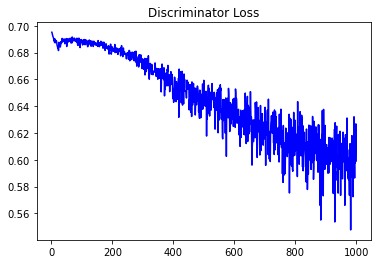

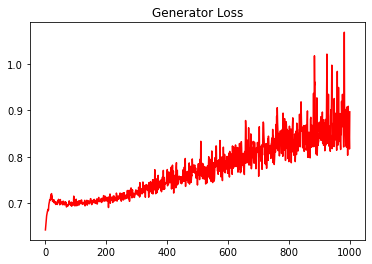

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.5276288781277836


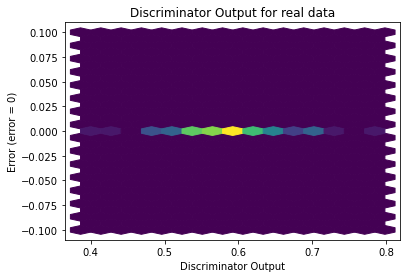

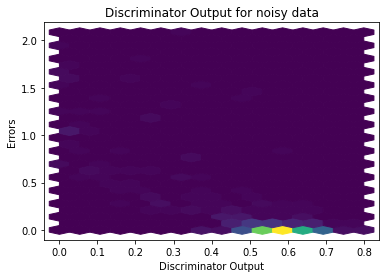

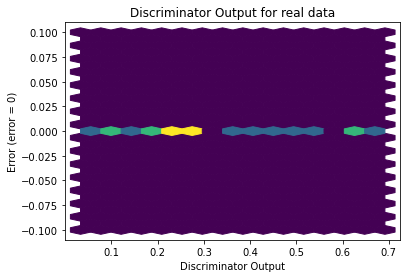

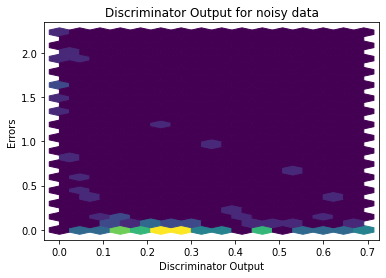

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


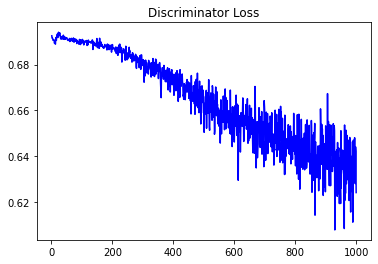

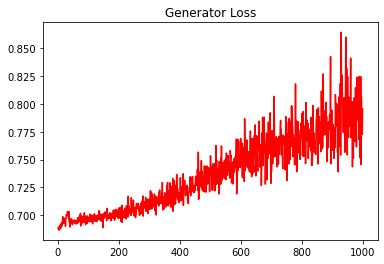

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.4604104652479291


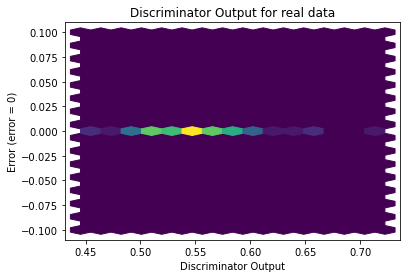

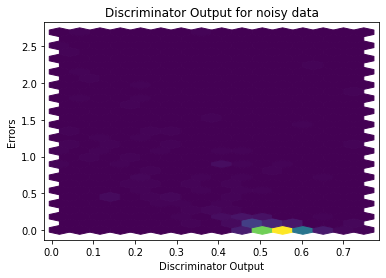

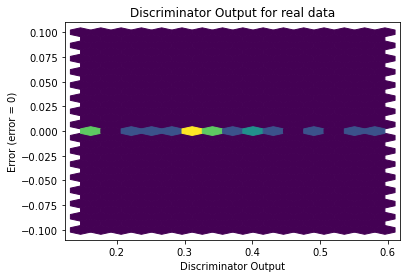

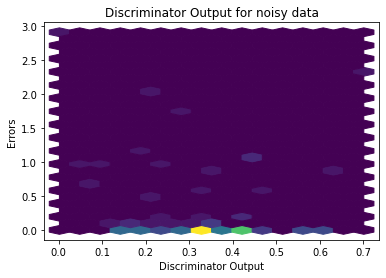

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1805]], requires_grad=True)
